In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
dim(housing_df)

[1] 1451   80

In [3]:
head(housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
count_empty_total()

In [5]:
numeric_features = colnames(Filter(is.numeric, housing_df))
numeric_features

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

In [6]:
numeric_df = Filter(is.numeric, housing_df)
numeric_df$SalePrice <- NULL
numeric_features = colnames(numeric_df)

In [7]:
attach(numeric_df)

In [8]:
numeric_log_df = log(numeric_df+0.000001)
numeric_log_sc_df = data.frame(scale(numeric_log_df))

In [9]:
head(numeric_log_sc_df)

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
-0.08309725,-0.1316206,1.0509849,0.8820760,1.2091088,0.7205018,-0.3601588,0.08917398,0.10842138,-0.8026317,⋯,1.02265460,0.2771098,-0.9589067,0.8961765,-0.4075404,-0.1295825,-0.2945948,-0.06959939,-0.1925484,0.1392663
0.56397645,0.1149991,0.1692304,-0.4188065,-0.8272233,0.7552734,-0.3601588,0.20492237,0.22641726,0.4214040,⋯,-0.09204807,0.2390487,1.1006070,-1.1030800,-0.4075404,-0.1295825,-0.2945948,-0.06959939,-0.1925484,-0.6131080
0.05751312,0.4215520,0.9860786,0.8342087,1.1887900,0.6806608,-0.3601588,0.28181796,0.13033862,-0.5752722,⋯,0.94060083,0.2997008,-0.9589067,0.8545546,-0.4075404,-0.1295825,-0.2945948,-0.06959939,-0.1925484,0.1392663
-0.33253709,0.1049061,-1.8680714,-0.7103048,-0.8272233,0.5941378,-0.3601588,0.32144248,0.07065950,-0.4377884,⋯,0.81736628,0.3115320,-0.9589067,0.8342210,2.5587562,-0.1295825,-0.2945948,-0.06959939,-0.1925484,-1.3658572
0.71602292,0.8798018,0.9536011,0.7384023,1.2709463,0.7125017,-0.3601588,0.30382402,0.19684307,0.1146148,⋯,0.89954319,0.3689426,1.0542083,0.9318585,-0.4075404,-0.1295825,-0.2945948,-0.06959939,-0.1925484,0.1392663
0.75290305,0.8600478,0.7258029,0.4984665,-0.8272233,0.7243605,-0.3601588,-0.06527209,0.08633152,-1.0317819,⋯,0.61156359,0.2483025,0.8886443,0.8170292,-0.4075404,7.9366958,-0.2945948,-0.06959939,5.1798537,0.8912659


## Correlation

In [10]:
cor(numeric_log_sc_df)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
LotFrontage,1.000000000,0.65535329,0.087069702,0.057639893,0.104429170,0.051612989,0.035772027,0.0779775537,0.046094549,0.42356821,⋯,0.039806450,0.138245134,0.048058090,0.120907944,-0.028565003,0.0548815335,0.043682434,0.120094482,0.030678229,0.005022926
LotArea,0.655353291,1.00000000,0.023286161,0.028858573,0.052814183,0.067731102,0.083293508,0.0384183553,0.048199458,0.46562245,⋯,-0.019277384,0.162472538,0.105167713,0.120962742,-0.024114169,0.0548235519,0.085829441,0.098319734,0.080109471,-0.025959684
YearBuilt,0.087069702,0.02328616,1.000000000,0.587285964,0.421505468,0.144211502,-0.065713733,0.0868201778,0.120114838,0.27970350,⋯,0.775810783,0.267481414,0.308819664,0.407195918,-0.454332119,0.0301144884,-0.060370538,0.006425655,-0.076256981,-0.014408357
YearRemodAdd,0.057639893,0.02885857,0.587285964,1.000000000,0.231061516,0.005629673,-0.102209760,0.1639524671,0.162369617,0.23601538,⋯,0.613682643,0.143437166,0.289845807,0.393510981,-0.229129513,0.0540804565,-0.039232925,0.009960942,-0.077398731,0.035228397
MasVnrArea,0.104429170,0.05281418,0.421505468,0.231061516,1.000000000,0.166412507,-0.056336574,0.0850813329,0.123851099,0.32392257,⋯,0.317124394,0.189434221,0.157892366,0.214022898,-0.196005914,0.0468561294,0.028199105,0.003709778,-0.048885558,-0.002684037
BsmtFinSF1,0.051612989,0.06773110,0.144211502,0.005629673,0.166412507,1.000000000,0.231101678,-0.0870585816,0.256117683,0.16985839,⋯,0.018785462,0.104623829,0.060758606,-0.003349380,-0.128749833,0.0535260955,0.068993242,0.031751183,0.014995778,0.037229477
BsmtFinSF2,0.035772027,0.08329351,-0.065713733,-0.102209760,-0.056336574,0.231101678,1.000000000,-0.2246257049,0.064210582,0.06557545,⋯,-0.105719209,0.046399279,0.053764915,-0.084538912,0.038296637,-0.0158889030,0.056064318,0.068409430,0.032936186,0.026941188
BsmtUnfSF,0.077977554,0.03841836,0.086820178,0.163952467,0.085081333,-0.087058582,-0.224625705,1.0000000000,0.547295361,0.09032540,⋯,0.103632688,0.092148902,0.039293402,0.166757350,-0.020230927,0.0009963081,0.019609612,-0.019804754,-0.017705405,-0.002505174
TotalBsmtSF,0.046094549,0.04819946,0.120114838,0.162369617,0.123851099,0.256117683,0.064210582,0.5472953609,1.000000000,0.12195099,⋯,0.099422230,0.116643372,0.120459312,0.135484109,-0.005246009,-0.0078302284,0.055898232,0.020121337,-0.046624220,-0.029687553
FirstFlrSF,0.423568209,0.46562245,0.279703504,0.236015377,0.323922569,0.169858393,0.065575451,0.0903254033,0.121950985,1.00000000,⋯,0.214466070,0.213639577,0.185429459,0.239766943,-0.124716834,0.0584860817,0.101949402,0.100268152,-0.041785170,-0.015437305


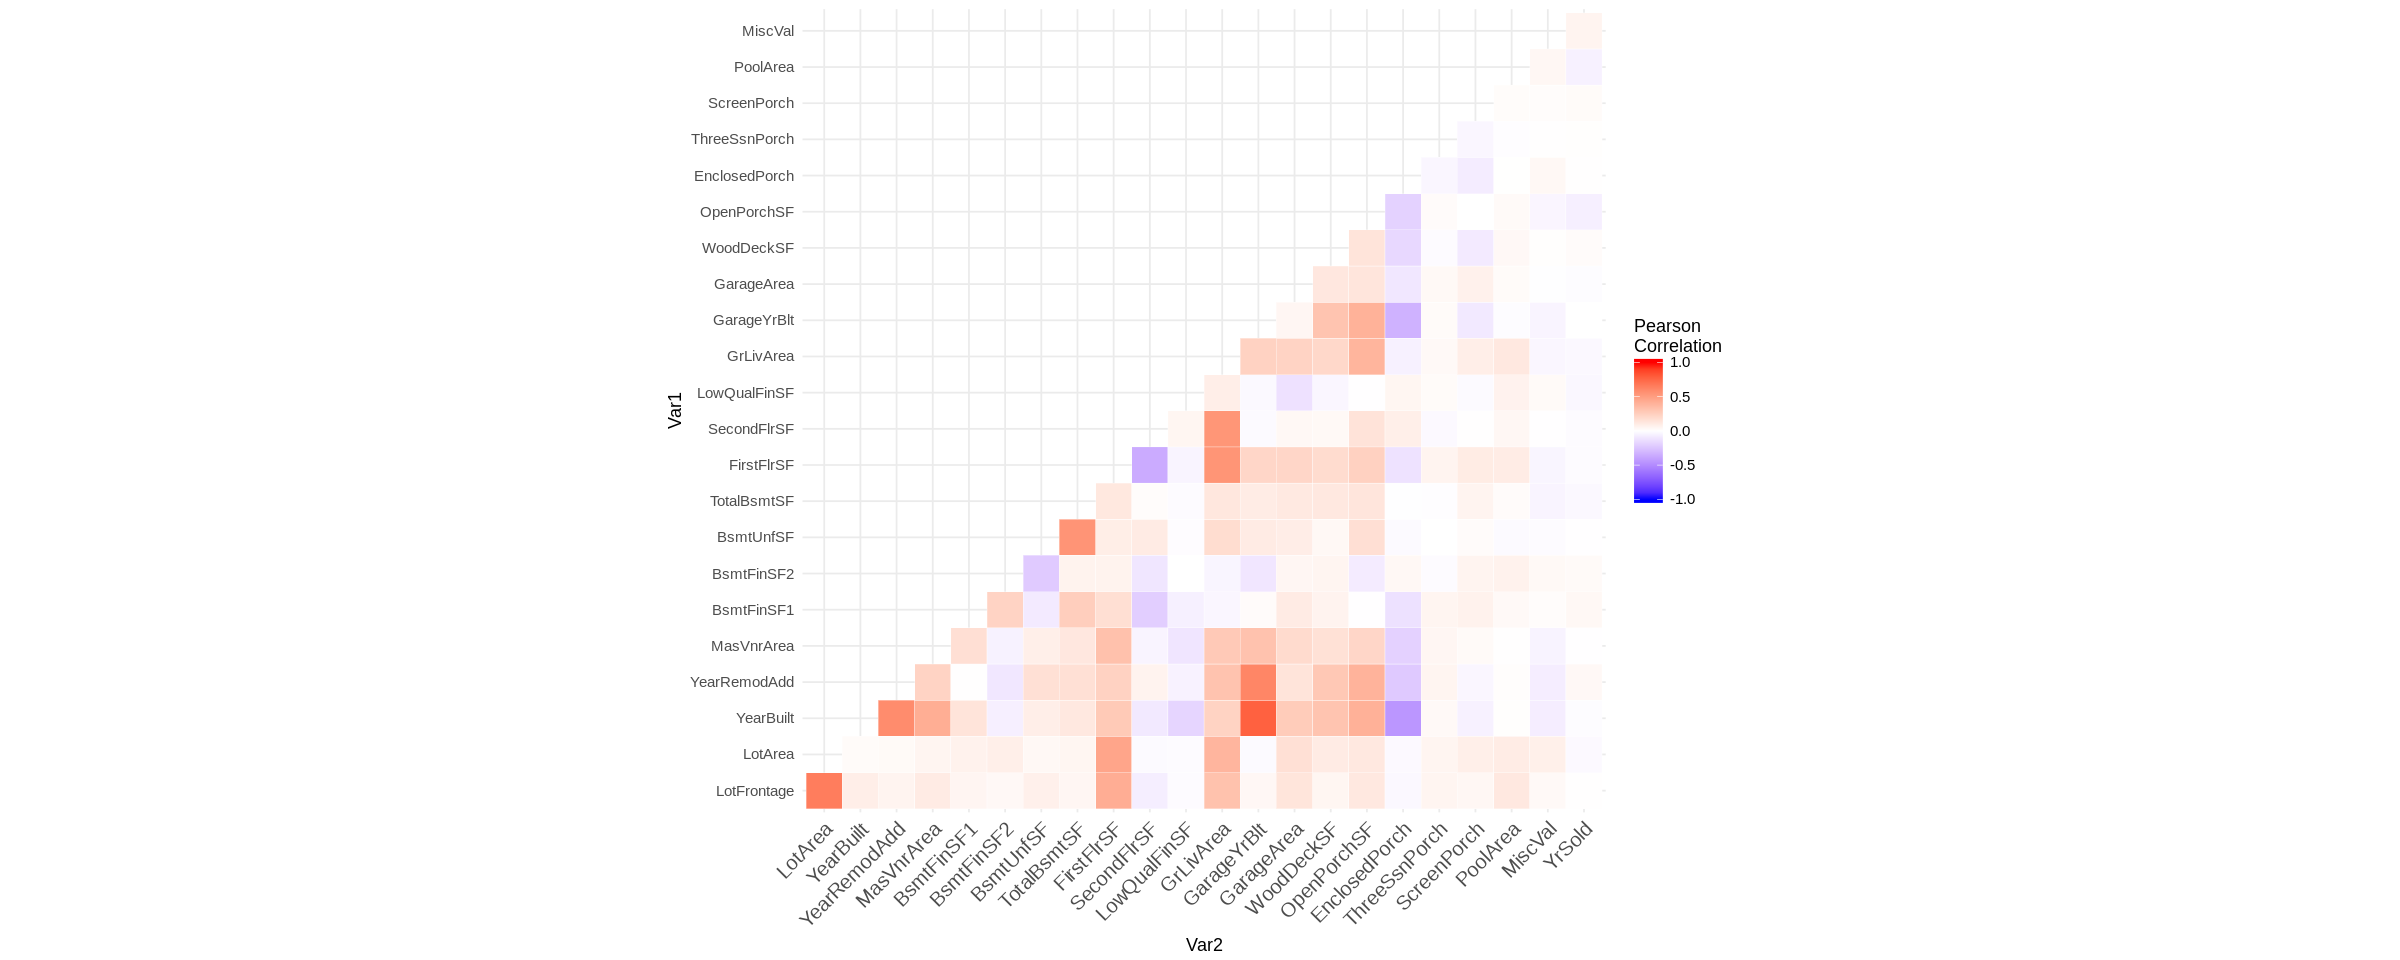

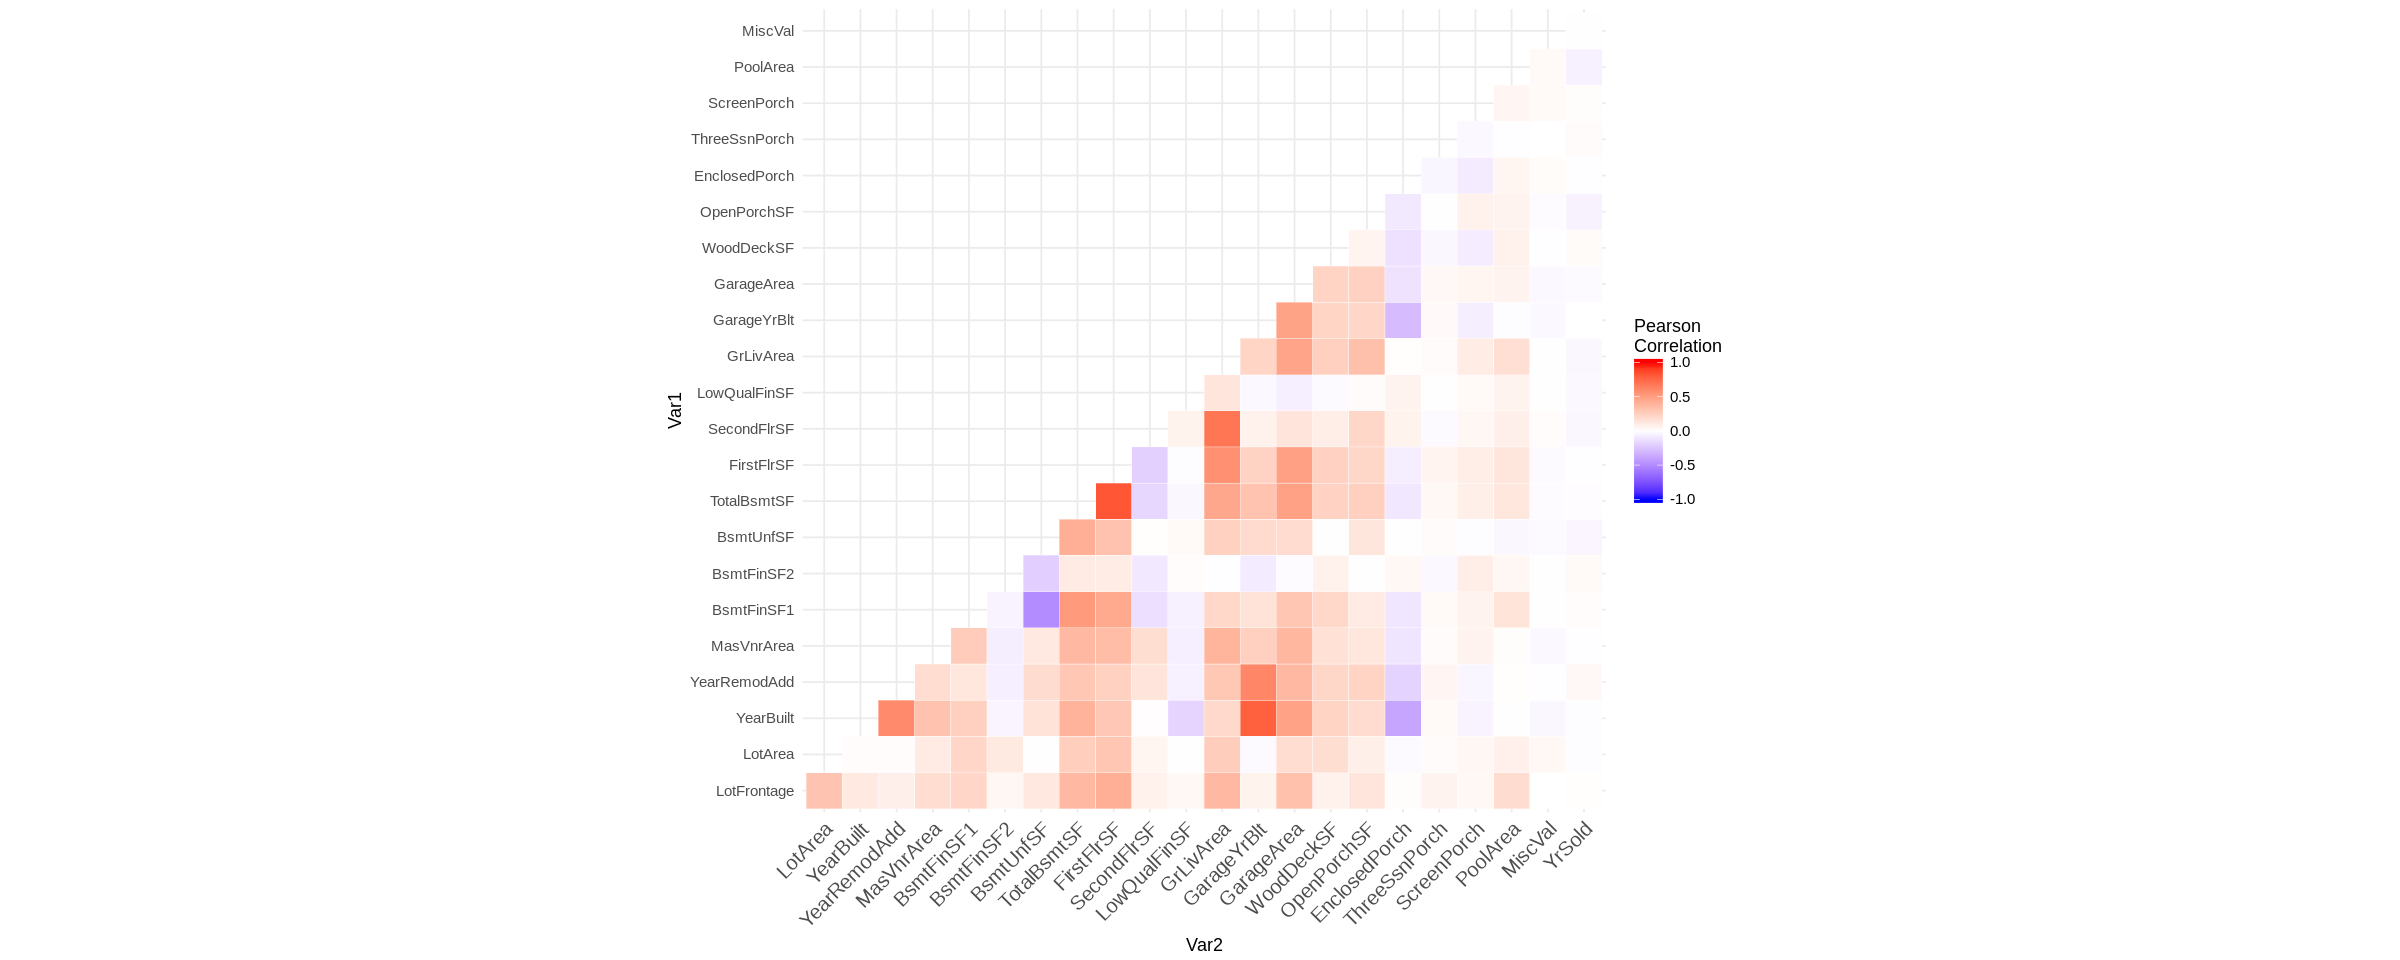

In [11]:
library(reshape2)
cormat_log_sc = cor(numeric_log_sc_df)

cormat_log_sc[lower.tri(cormat_log_sc)] <- NA
diag(cormat_log_sc) <- NA

melted_cormat_log_sc <- melt(cormat_log_sc, na.rm = T)

library(ggplot2)
p1 <- ggplot(data = melted_cormat_log_sc, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

cormat = cor(numeric_df)

cormat[lower.tri(cormat)] <- NA
diag(cormat) <- NA

melted_cormat <- melt(cormat, na.rm = T)

library(ggplot2)
p2 <- ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

p1; p2